In [1]:
# setup plotting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# setup for calc
import numpy as np
import pandas as pd

In [3]:
# setup for Date processing
import datetime as dt
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# build out the data engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the measurement, station classes to variables called 'Measurement','Station'
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# look https://ku.bootcampcontent.com/ku-coding-boot-camp
#                /KU-OVE-DATA-PT-01-2020-U-C/blob/master
#                /01-Lesson-Plans/10-Advanced-Data-Storage-and-Retrieval
#                /2/Extra_Content/Activities/01-Stu_Prescriptions/Solved
#                /Stu_Prescriptions.ipynb
#
# Design a query to retrieve the last 12 months of precipitation data 
#               and plot the results
# BONUS: Query and print the number of unique Locations
# Hints: Look into counting and grouping operations in SQLAlchemy
#--locations = session.query(Demographics).group_by(Demographics.location).count()
#--print(locations)
# Use the session to query Measurement table and display the last 12 months
# for row in session.query(Measurement, Measurement.location).limit(12).all():
# for row in session.query().limit(12).all():    
#    print(row)

In [11]:
# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
prev_year

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date)
results

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ["date", "precipitation"])
df

,date,precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [14]:
# Sort the dataframe by date
df = df.sort_values("date")
df.set_index(df["date"], inplace = True)
df

,date,precipitation
date,,
2010-01-01,2010-01-01,0.08
2010-01-01,2010-01-01,0.21
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.05
...,...,...
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


Text(0, 0.5, 'Inches Precip')

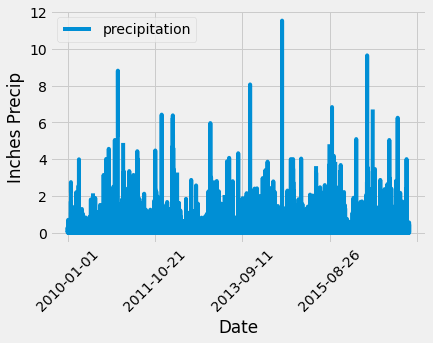

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Inches Precip")

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).\
    desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
prev_year

datetime.date(2016, 8, 23)

In [21]:
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
results

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

Text(0, 0.5, 'Observations')

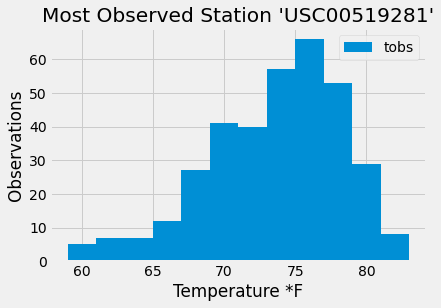

In [22]:
#                 and plot the results as a histogram
df = pd.DataFrame(results, columns = ["tobs"])
df.plot.hist(bins = 12)
plt.title("Most Observed Station 'USC00519281'")
plt.xlabel("Temperature *F")
plt.ylabel("Observations")

## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs),\
                         func.avg(Measurement.tobs),\
                         func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#         week of birthday 
prev_year_start = dt.date(2018, 5, 1) - dt.timedelta(days = 365)
prev_year_end = dt.date(2018, 5, 7) - dt.timedelta(days = 365)
print (prev_year_start, prev_year_end)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"),\
                             prev_year_end.strftime("%Y-%m-%d"))[0]
print (tmin, tavg, tmax)

2017-05-01 2017-05-07
65.0 75.675 80.0


C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


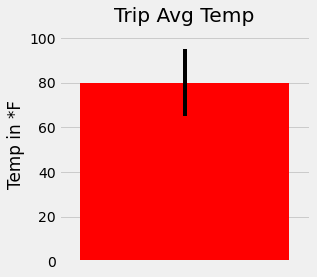

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize = plt.figaspect(1))
xpos = 1
yerr = tmax - tmin
# bar chart with labels
bar = ax.bar(xpos,tmax,yerr = yerr, color = 'red', align = "center")
ax.set(xticks = range(xpos), xticklabels = "|", title = "Trip Avg Temp", ylabel = "Temp in *F")
ax.margins(.1, .1)
# fig.outofmt_xdate()     or     fig.tight_layout()
fig.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates 
#     using the previous year's matching dates.
# Sort this in descending order by precipitation amount 
#     and list the station, name, latitude, longitude, and elevation
start_date = "2017-05-01"
end_date = "2017-05-07"

select = [Station.station, Station.name,
          Station.latitude, Station.longitude,
          Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*select).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).\
            desc()).all()
print(results)

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.47000000000000003), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.38), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.26), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.18), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.17), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.07)]


In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    select = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*select).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
#
# Set the start and end date of the trip
trip_start_date = "2017-05-01"
trip_end_date = "2017-05-07"
# Use the start and end date to create a range of dates
trip_dates_range = pd.date_range(trip_start_date, trip_end_date, freq='D')
trip_dates_range

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07'],
              dtype='datetime64[ns]', freq='D')

In [29]:
# Stip off the year and save a list of %m-%d strings
trip_mmdd_list = trip_dates_range.strftime('%m-%d')
trip_mmdd_list

Index(['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07'], dtype='object')

In [30]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# "normals" will include the min - avg - max
normals = []
for date in trip_mmdd_list:
    normals.append(*daily_normals(date))
#
normals

[(65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0),
 (67.0, 73.41071428571429, 84.0),
 (65.0, 73.59649122807018, 78.0),
 (67.0, 73.39655172413794, 79.0),
 (66.0, 73.14035087719299, 80.0),
 (64.0, 71.78846153846153, 79.0)]

In [31]:
# Load the previous query results into a Pandas DataFrame 
# and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns = ["tmin", "tavg", "tmax"])
df["date"] = trip_dates_range
df.set_index(["date"],inplace = True)
df

,tmin,tavg,tmax
date,,,
2017-05-01,65.0,72.759259,79.0
2017-05-02,65.0,73.050847,79.0
2017-05-03,67.0,73.410714,84.0
2017-05-04,65.0,73.596491,78.0
2017-05-05,67.0,73.396552,79.0
2017-05-06,66.0,73.140351,80.0
2017-05-07,64.0,71.788462,79.0


Text(0, 0.5, 'Temp in *F')

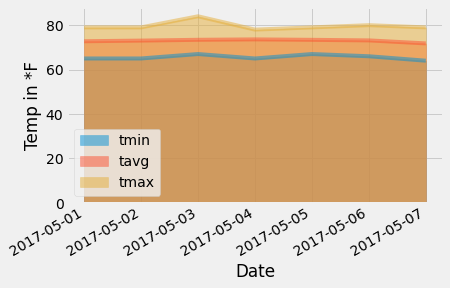

In [33]:
# Plot the daily normals as an "area" plot with `stacked=False`
# see...  https://pythontic.com/pandas/dataframe-plotting/area-plot
#
df.plot(kind="area", stacked=False, x_compat=True)
plt.xlabel("Date")
plt.ylabel("Temp in *F")